In [45]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
headers={
    "user-agent":"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "Accept-Encoding":"False"#오 이거 개쩐다
}

params={}#{"keyword":"한글"}

url="http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

In [5]:
def getUrl(url, params=None, select="a", num_retrive=2):#구글 외의 사이트에서는 a만 찾아오게 한다
    html= requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retrive>0:
        print(html.status_code, html.reason)
        return getUrl(url, params=params, num_retrive=num_retrive-1)
    
    dom= BeautifulSoup(html.text, "html.parser")
    links =dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href")==True]

In [99]:
def getContent(url, params=None, select="a", num_retrive=2):#구글 외의 사이트에서는 a만 찾아오게 한다
    html= requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retrive>0:
        print(html.status_code, html.reason)
        return getUrl(url, params=params, num_retrive=num_retrive-1)
    
    dom= BeautifulSoup(html.text, "html.parser")#자바스크립트빼고 긁어옴
    for script in dom(['script', 'style']):
        script.decompose()
    links =dom.select(select)
    
    return links

In [100]:
seed="https://news.naver.com/main/read.nhn?oid=055&sid1=103&aid=0000660305&mid=shm&mode=LSD&nh=20180720141015"
params={}
seed="https://news.naver.com/main/read.nhn?oid=055&sid1=103&aid=0000660305&mid=shm&mode=LSD&nh=20180720141015"
cont=getContent(seed, params, "div.article_body._font_setting_target.size3.font1 > div")
print(cont[0].get_text().strip()) #strip() 공백제거

● 태풍 밀어내는 폭염…폭염 밀어내는 태풍하루도 쉬지 않고 폭염이 기승을 부리고 있다. 장마가 끝나고 폭염이 시작된 지 이제 10일 다되어가지만 폭염의 기세는 좀처럼 누그러지지 않고 있다. 연일 전국의 낮 최고 기온이 35도를 오르내리고 있다. 일부 지역에서는 지금까지 우리나라 역대 최고 기온인 40℃를 곧 넘어설 태세다.폭염이 기승을 부리는 가운데 필리핀 북동쪽 먼 해상인 일본 오키나와 남남동쪽 470km 부근 해상에서는 제10호 태풍 '암필(AMPIL)'이 북상하고 있다. 20일 오전 9시 현재 중심기압 985hPa(헥토파스칼), 중심에서는 초속 27m(시속 97km)의 강풍이 불고 있고 강풍 반경이 270km인 강도 중급의 소형 태풍이다. 태풍 암필은 앞으로 타이완 북쪽 먼 해상을 지나 22일 오전에는 중국 상하이 남쪽에 상륙할 것으로 기상청은 보고 있다. (예상진로 참고)제10호 태풍 암필 예상진로 (사진=기상청)태풍 암필이 한반도나 일본 쪽으로 북상하지 못하고 중국 남부로 향하는 것은 바로 한반도를 뜨겁게 달구고 있는 폭염 때문이다. 한반도 상공 상층에는 티베트지역 확장해온 뜨거운 고기압이 자리를 잡고 있고 하층에는 북태평양 고기압이 자리를 잡고 있다. 지표 부근 대류권 하층부터 12km를 넘는 대류권 상층까지 2층으로 두 개의 고기압이 한반도를 솥뚜껑처럼 덮고 있는 것이다. 흔히 말하는 '열돔(heat dome)'이 만들어진 것이다.한반도와 일본, 중국 동해안 일부까지도 덮고 있는 고기압(열돔)의 크기는 직경이 2000~3000km 정도에 이른다. 반경이 270km 정도인 태풍과 비교하면 면적만 비교해도 폭염을 몰고 온 고기압의 크기는 태풍보다 20배 정도는 크다. 또한 지상뿐 아니라 상층까지 3차원으로 크기를 비교하면 태풍과 폭염을 몰고 온 고기압의 차이는 훨씬 더 커진다.태풍에 따라 차이는 있지만 태풍 암필의 경우는 현재 6km 이상 고도에서는 태풍의 흔적을 찾아보기 힘들다. 그 이상의 고도에서는 태풍과 같은 저기압이 아니라 정반대인 고기압의 형

In [101]:
text=cont[0].get_text().strip()

In [102]:
text

"● 태풍 밀어내는 폭염…폭염 밀어내는 태풍하루도 쉬지 않고 폭염이 기승을 부리고 있다. 장마가 끝나고 폭염이 시작된 지 이제 10일 다되어가지만 폭염의 기세는 좀처럼 누그러지지 않고 있다. 연일 전국의 낮 최고 기온이 35도를 오르내리고 있다. 일부 지역에서는 지금까지 우리나라 역대 최고 기온인 40℃를 곧 넘어설 태세다.폭염이 기승을 부리는 가운데 필리핀 북동쪽 먼 해상인 일본 오키나와 남남동쪽 470km 부근 해상에서는 제10호 태풍 '암필(AMPIL)'이 북상하고 있다. 20일 오전 9시 현재 중심기압 985hPa(헥토파스칼), 중심에서는 초속 27m(시속 97km)의 강풍이 불고 있고 강풍 반경이 270km인 강도 중급의 소형 태풍이다. 태풍 암필은 앞으로 타이완 북쪽 먼 해상을 지나 22일 오전에는 중국 상하이 남쪽에 상륙할 것으로 기상청은 보고 있다. (예상진로 참고)제10호 태풍 암필 예상진로 (사진=기상청)태풍 암필이 한반도나 일본 쪽으로 북상하지 못하고 중국 남부로 향하는 것은 바로 한반도를 뜨겁게 달구고 있는 폭염 때문이다. 한반도 상공 상층에는 티베트지역 확장해온 뜨거운 고기압이 자리를 잡고 있고 하층에는 북태평양 고기압이 자리를 잡고 있다. 지표 부근 대류권 하층부터 12km를 넘는 대류권 상층까지 2층으로 두 개의 고기압이 한반도를 솥뚜껑처럼 덮고 있는 것이다. 흔히 말하는 '열돔(heat dome)'이 만들어진 것이다.한반도와 일본, 중국 동해안 일부까지도 덮고 있는 고기압(열돔)의 크기는 직경이 2000~3000km 정도에 이른다. 반경이 270km 정도인 태풍과 비교하면 면적만 비교해도 폭염을 몰고 온 고기압의 크기는 태풍보다 20배 정도는 크다. 또한 지상뿐 아니라 상층까지 3차원으로 크기를 비교하면 태풍과 폭염을 몰고 온 고기압의 차이는 훨씬 더 커진다.태풍에 따라 차이는 있지만 태풍 암필의 경우는 현재 6km 이상 고도에서는 태풍의 흔적을 찾아보기 힘들다. 그 이상의 고도에서는 태풍과 같은 저기압이 아니라 정반대인 고기압의 

In [103]:
text=re.sub("[^ㄱ-하-ㅣ가-힣]","",text)

In [104]:
text

'태풍밀어내는폭염폭염밀어내는태풍하루도쉬지않고폭염이기승을부리고있다장마가끝나고폭염이시작된지이제일다되어가지만폭염의기세는좀처럼누그러지지않고있다연일전국의낮최고기온이도를오르내리고있다일부지역에서는지금까지우리나라역대최고기온인를곧넘어설태세다폭염이기승을부리는가운데필리핀북동쪽먼해상인일본오키나와남남동쪽부근해상에서는제호태풍암필이북상하고있다일오전시현재중심기압헥토파스칼중심에서는초속시속의강풍이불고있고강풍반경이인강도중급의소형태풍이다태풍암필은앞으로타이완북쪽먼해상을지나일오전에는중국상하이남쪽에상륙할것으로기상청은보고있다예상진로참고제호태풍암필예상진로사진기상청태풍암필이한반도나일본쪽으로북상하지못하고중국남부로향하는것은바로한반도를뜨겁게달구고있는폭염때문이다한반도상공상층에는티베트지역확장해온뜨거운고기압이자리를잡고있고하층에는북태평양고기압이자리를잡고있다지표부근대류권하층부터를넘는대류권상층까지층으로두개의고기압이한반도를솥뚜껑처럼덮고있는것이다흔히말하는열돔이만들어진것이다한반도와일본중국동해안일부까지도덮고있는고기압열돔의크기는직경이정도에이른다반경이정도인태풍과비교하면면적만비교해도폭염을몰고온고기압의크기는태풍보다배정도는크다또한지상뿐아니라상층까지차원으로크기를비교하면태풍과폭염을몰고온고기압의차이는훨씬더커진다태풍에따라차이는있지만태풍암필의경우는현재이상고도에서는태풍의흔적을찾아보기힘들다그이상의고도에서는태풍과같은저기압이아니라정반대인고기압의형태로나타난다태풍암필의키가에불과한것이다반면에폭염을몰고온고기압은지상부터상층으로는이상고도까지고기압형태를유지하고있다한반도주변과상공에직경이높이가를넘는커다란열기둥이서있는것이다폭염을몰고온고기압을건장한어른에비유한다면태풍암필은갓태어난어린아이정도도채안된다때문에현재와같은상황에서는태풍이폭염을몰고온고기압을밀어붙이고한반도나일본쪽으로북상할가능성은없다태풍이택할수있는길은현재로서는고기압가장자리를따라이동하는것뿐이다호태풍암필이타이완북쪽해상을지나중국상하이남쪽으로향할것으로예상하는이유다폭염을몰고온고기압이태풍이올라오는것을막고중국쪽으로밀어내고있는것이다태풍도밀어내는폭염의기세는당분간꺾이지않을것으로보인다특히서울을기준으로볼때다음주초에는폭염의기세가차절정에이를것으로예

In [108]:
tokens=k.morphs(text)

In [109]:
len(tokens)

1319

In [110]:
article=nltk.Text(tokens)

In [111]:
article.vocab()

FreqDist({'이': 67, '는': 61, '고': 41, '태풍': 39, 'ㄴ': 38, '하': 33, '을': 30, '다': 30, '의': 28, '폭염': 27, ...})

In [112]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)

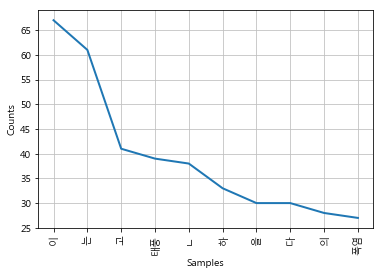

None


In [113]:
print(article.plot(10))

In [38]:
article.count("폭염")

29

In [39]:
article.similar("폭염")

태풍 고기압 것 기승 을 저 직경 상황 이유 서울 최상 시기 자연현상


In [42]:
article.similar("태풍")

폭염 것 태세 저 때문 고기압 직경 저기압 상황 가능성 길 이유 문제 최상
